In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import os
data = "../data/4_class_tt/"

In [3]:
import glob
files = [f for f in glob.glob(data + "**/*.jpg", recursive=True)]
files

['../data/4_class_tt/test/estrus/C39_7_27_image2.jpg',
 '../data/4_class_tt/test/estrus/C8_7_26_image2.jpg',
 '../data/4_class_tt/test/estrus/C45_8_3_image1.jpg',
 '../data/4_class_tt/test/estrus/C17_7_27_image2.jpg',
 '../data/4_class_tt/test/estrus/C28_7_30_image1.jpg',
 '../data/4_class_tt/test/estrus/C5_7_27_image2.jpg',
 '../data/4_class_tt/test/estrus/C31_7_25_image1_REDO.jpg',
 '../data/4_class_tt/test/estrus/C17_7_26_image2.jpg',
 '../data/4_class_tt/test/estrus/C43_7_25_image1.jpg',
 '../data/4_class_tt/test/estrus/C28_7_25_image2.jpg',
 '../data/4_class_tt/test/estrus/C9_8_1_image2.jpg',
 '../data/4_class_tt/test/estrus/C44_7_26_image1.jpg',
 '../data/4_class_tt/test/estrus/C20_7_27_image2.jpg',
 '../data/4_class_tt/test/estrus/C48_7_25_image1.jpg',
 '../data/4_class_tt/test/estrus/C9_8_9_image1.jpg',
 '../data/4_class_tt/test/estrus/C42_7_29_image1.jpg',
 '../data/4_class_tt/test/estrus/C45_8_8_image1.jpg',
 '../data/4_class_tt/test/estrus/C14_8_3_image2.jpg',
 '../data/4_cl

In [4]:
import skimage
from skimage import io
import numpy as np

'../data/4_class_tt/train/estrus/C40_7_25_image1.jpg'

(0, 255)

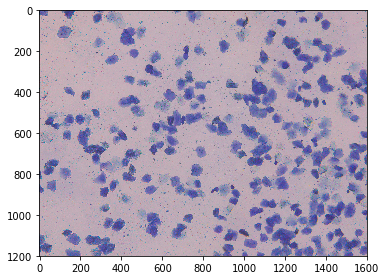

In [5]:
from random import randint
name = files[randint(0, len(files))]
name
img1 = io.imread(name)
img1.min(), img1.max()
io.imshow(img1)

# Testing Delgado et al. Convert to Gray colorspace and Otsu thresholding

(0.20084431372549016, 0.9360858823529411)

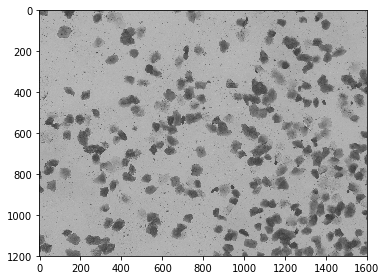

In [6]:
grayed = skimage.color.rgb2gray(img1)
grayed.min(), grayed.max()
io.imshow(grayed)

In [7]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(grayed)
thresh

0.5440527803308823

(False, True)

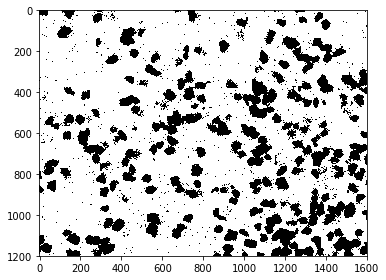

In [8]:
binary = grayed > thresh
binary.min(), binary.max()
io.imshow(binary)

In [9]:
grayed

array([[0.48232627, 0.47432902, 0.4782051 , ..., 0.66760078, 0.65835098,
        0.70398549],
       [0.47480431, 0.46586784, 0.46801686, ..., 0.62622039, 0.62963686,
        0.65543961],
       [0.45550196, 0.4608651 , 0.45353765, ..., 0.64013137, 0.63123255,
        0.62785647],
       ...,
       [0.67987059, 0.66196706, 0.66266118, ..., 0.66771451, 0.66848745,
        0.66653804],
       [0.67721647, 0.66209569, 0.66798941, ..., 0.64192235, 0.65388667,
        0.65727255],
       [0.6826051 , 0.67084039, 0.67886039, ..., 0.66771451, 0.6732949 ,
        0.65317412]])

In [10]:
grayed.min(), grayed.max()

(0.20084431372549016, 0.9360858823529411)

In [11]:
grayed.dtype

dtype('float64')

## Test the Median filter they also mentioned before thresholding

/home/andrew/.miniconda3/envs/pt/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(63, 183)

(1200, 1600)

dtype('uint8')

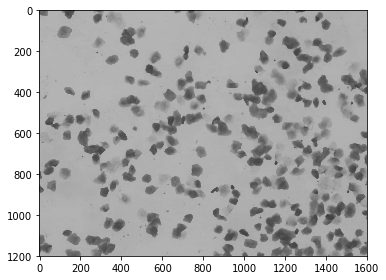

In [12]:
grayed_median_filter = skimage.filters.median(grayed, np.ones((8,8)))
grayed_median_filter.min(), grayed_median_filter.max()
grayed_median_filter.shape
grayed_median_filter.dtype
io.imshow(grayed_median_filter)

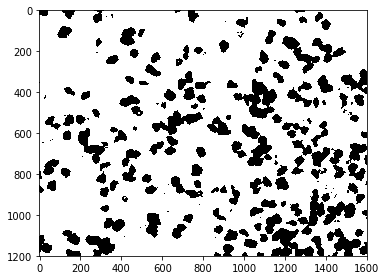

In [13]:
thresh_median = threshold_otsu(grayed_median_filter)
binary_median = grayed_median_filter > thresh_median
io.imshow(binary_median)


Perform a masking using otsu

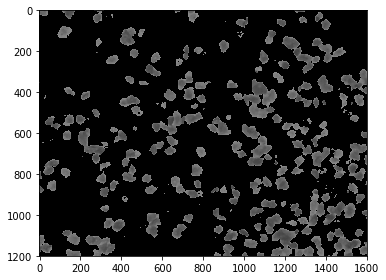

In [14]:
grayed_median_filter[binary_median] = 0
io.imshow(grayed_median_filter)

As we can see from above, median filter does indeed remove noise.

**Delgado et al. used a 5,5 window, but we may want to increase to 8,8 because I observe a larger window reduces the noise better for our dataset**

A median filter might even be good for our own CNN methods! Our dataset really is noisy

# CIELAB Testing

In [15]:
labbed = skimage.color.rgb2lab(img1)
labbed.min(), labbed.max()

(-75.42403277856748, 94.97347786185897)

In [16]:
alpha = labbed[:,:,1]
beta = labbed[:,:,2]

/home/andrew/.miniconda3/envs/pt/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


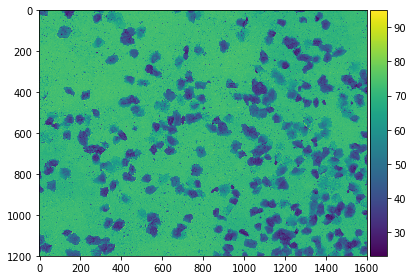

In [17]:
io.imshow(labbed[:,:,0])

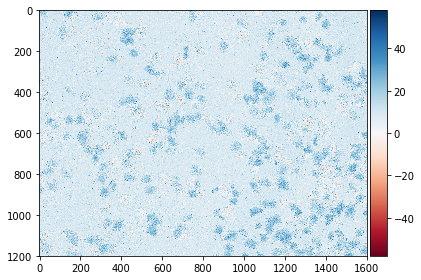

In [18]:
io.imshow(alpha)

In [19]:
threshold_otsu(alpha)

13.433727467095686

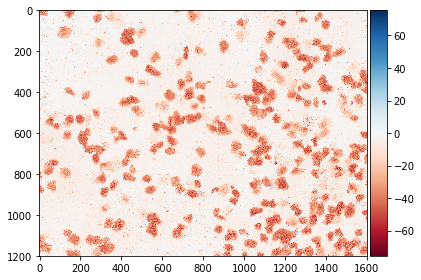

In [20]:
io.imshow(beta)

In [21]:
converted = (alpha + 127).astype("uint8")
converted.min(), converted.max()

(81, 184)

In [22]:
beta.dtype

dtype('float64')

# GLCM Testing

In [23]:
import scipy
binary_median.min(), binary_median.max()

(False, True)

In [24]:
grayed_median_filter.min(), grayed_median_filter.max(), 

(0, 139)

In [25]:
from skimage.feature import greycomatrix, greycoprops
from math import radians as rad
glcm = greycomatrix(grayed_median_filter, (1, 5), (0, rad(45), rad(90), rad(135)), normed=True)
glcm.shape

(256, 256, 2, 4)

In [26]:
greycoprops(glcm, "contrast")

greycoprops(glcm, "dissimilarity")

greycoprops(glcm, "homogeneity")

greycoprops(glcm, "energy")

array([[211.12237544, 294.27844081, 217.14318442, 291.26836831],
       [881.42351306, 990.40536437, 907.84124006, 979.7315582 ]])

array([[1.98081197, 2.76462353, 2.04061145, 2.73677043],
       [8.31437618, 9.34950147, 8.5785591 , 9.25614098]])

array([[0.88002831, 0.85838166, 0.87683079, 0.85876107],
       [0.78745975, 0.77981373, 0.7851439 , 0.7804823 ]])

array([[0.77908352, 0.77661851, 0.77894198, 0.77670171],
       [0.75677249, 0.75290765, 0.75611391, 0.75329101]])

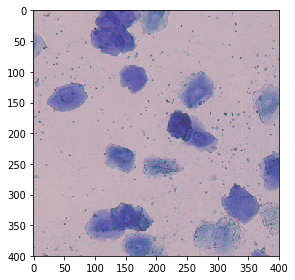

In [27]:
x = 100
y = 300
size=400
io.imshow(img1[x:x+size, y:y+size, :])

In [28]:
img1.mean()

164.90507430555556

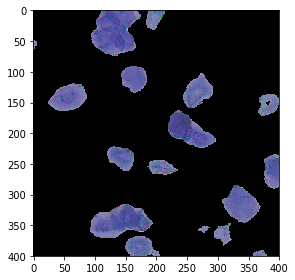

In [29]:
segmented = img1.copy()
segmented[binary_median] = 0
io.imshow(segmented)
io.imshow(segmented[x:x+size, y:y+size, :])

In [30]:
segmented.mean()

26.01644548611111

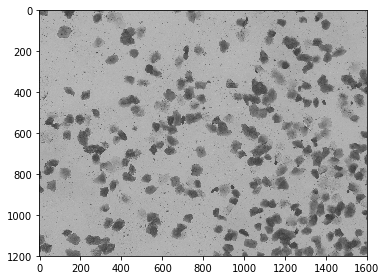

In [31]:
io.imshow(grayed)

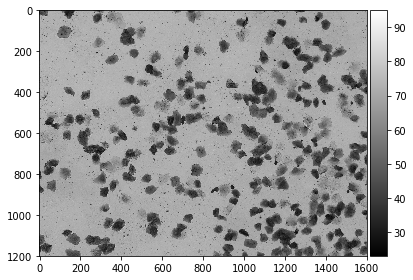

In [32]:
io.imshow(labbed[:,:,0], cmap="gray")

# Make a standalone segmentation function

In [36]:
import skimage


def otsu_segment(image, median_filter_blur=7, inplace=False):
    """
    Runs a median filter and otsu thresholding to segment images. Image must be single channel uint8.
    
    """
    # whether to do inplace edit or not
    if not inplace:
        image = image.copy()
    # turn to grayscale
#     grayed = skimage.color.rgb2gray(image)
    # apply median blur
    blur = np.ones((median_filter_blur, median_filter_blur))
    denoised = skimage.filters.median(grayed, blur)
    # segment using otsu threshold
    thresh = skimage.filters.threshold_otsu(denoised)
    mask = denoised > thresh
    image[mask] = 0
    # return
    return image
    

In [49]:
from skimage.feature import greycomatrix, greycoprops

def extract_glcm_features(image, props=("contrast", "dissimilarity", "homogeneity", "energy")):
    grayed = skimage.color.rgb2gray(image)
    grayed = skimage.img_as_ubyte(grayed) # convert [0,1] to [0,255]
    labbed = skimage.color.rgb2lab(image)
    alpha = (labbed[:,:,1] + 127).astype("uint8") # to convert to gray, alpha + 127, beta + 128. https://stackoverflow.com/questions/25294141/cielab-color-range-for-scikit-image
    beta = (labbed[:,:,2] + 128).astype("uint8")
    
    segmentations = []
    feature_arrs = []
    for channel in (grayed, alpha, beta):
        segmented = otsu_segment(channel)
        segmentations.append(segmented)
        glcm = greycomatrix(segmented, (1, 5), (0, rad(45), rad(90), rad(135)), normed=True)

        for prop in props:
            feat = greycoprops(glcm, prop)
            feature_arrs.append(feat)
            
    features = np.ravel(feature_arrs)
    return features, segmentations
            

In [61]:
np.set_printoptions(suppress=True)
feat, seg = extract_glcm_features(img1)
feat

array([ 224.67168386,  313.63088951,  231.61883601,  309.5306272 ,
        898.53006426, 1007.16372558,  926.3253363 ,  997.51618595,
          2.83443871,    3.76102401,    2.90051345,    3.70265715,
          9.08230564,   10.07888555,    9.33836872,    9.98620087,
          0.81498098,    0.80541582,    0.81465216,    0.80615756,
          0.77260885,    0.76714719,    0.77133964,    0.76765741,
          0.77687774,    0.77433034,    0.77672215,    0.77442397,
          0.75405679,    0.75013887,    0.75334979,    0.75051349,
        241.80823952,  342.0631989 ,  247.67129639,  338.13669667,
       1115.90629258, 1270.75011892, 1144.45464017, 1255.22444542,
          3.13896289,    4.00879772,    3.1637599 ,    3.98315513,
          9.52632184,   10.61124645,    9.73858473,   10.5112431 ,
          0.80642793,    0.80027848,    0.80635357,    0.80008584,
          0.77579332,    0.77124668,    0.7749773 ,    0.77149162,
          0.77689622,    0.77434966,    0.77674097,    0.77444

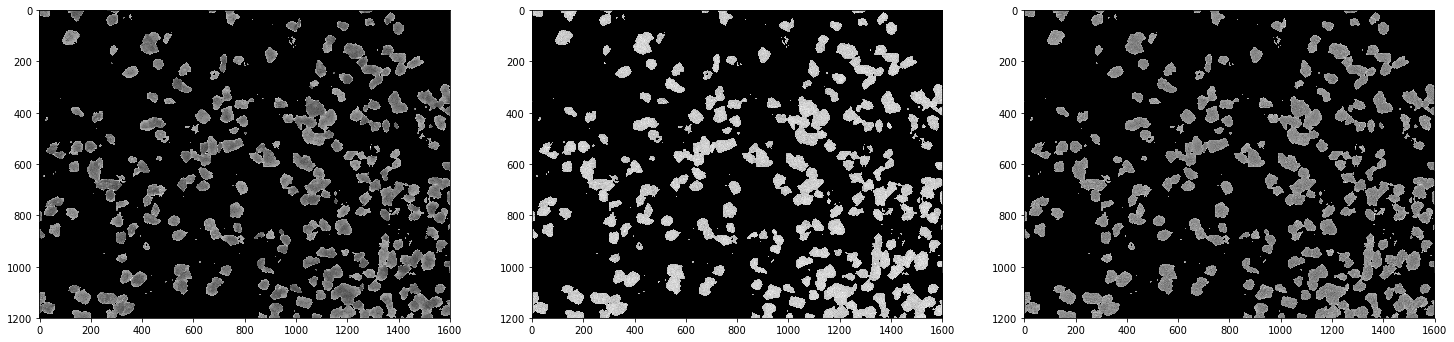

In [60]:
f, ax = plt.subplots(1, 3, figsize=(25,25))
for i in range(3):
    ax[i].imshow(seg[i], cmap="gray")

# Test idea of croppings

In [40]:
img1.shape

(1200, 1600, 3)

In [41]:
def patch_gen(image):
    for y in range(0, image.shape[0], int(size/4)):
        for x in range(0, image.shape[1], int(size/4)):
            yield image[y:y+size, x:x+size,:]

In [42]:
gen = patch_gen(img1)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 400 but corresponding boolean dimension is 1200

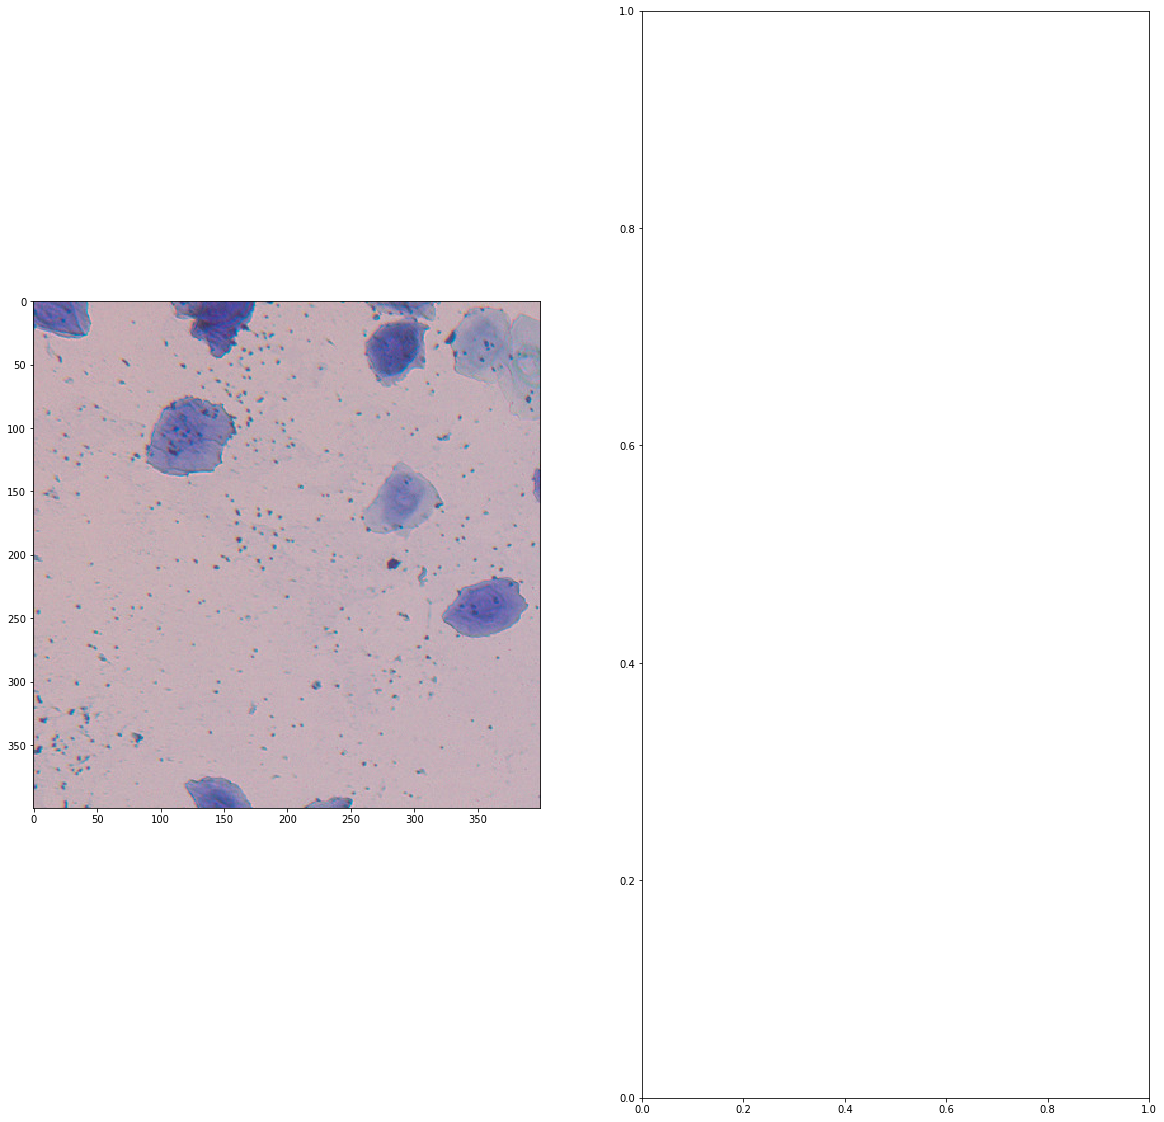

In [43]:
import matplotlib.pyplot as plt

x = next(gen)

f, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(x)
x = otsu_segment(x)
x.mean()
ax[1].imshow(x)